In [1]:
# Data processing
import numpy as np
import pandas as pd
import geopandas as gpd
from datetime import datetime
import simpledbf as sdbf

# Visualisation
import matplotlib
from ipyleaflet import Map, GeoData, basemaps, LayersControl
import seaborn
import folium
import mapclassify

#API Handling
import simplejson
import urllib.request as ur
import routingpy as rp
import googlemaps
KEY = ""

PyTables is not installed. No support for HDF output.


In [56]:
# Postal codes database
buildings = gpd.read_file('Generated Files/buildings_EPSG3414_no-dups.shp')

# Amenities
activesg = gpd.read_file('Generated Files/activesg.shp')
bus_stops = gpd.read_file('Generated Files/busstopssg_EPSG3414.shp')
hawkercentres = gpd.read_file('Generated Files/hawkercentres_EPSG3414.shp')
malls = gpd.read_file('Generated Files/malls_EPSG3414.shp')
parks = gpd.read_file('Generated Files/parks_EPSG3414.shp')
schools = gpd.read_file('Generated Files/schools_EPSG3414.shp')

#Subzones database
subzones_all_stats = gpd.read_file('Generated Files\subzones_all_stats.shp')
centroids = gpd.read_file('Generated Files/subzones_all_stats_with_travel_centroid.shp')

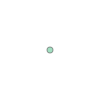

In [3]:
pasirris = centroids.loc[0,'geometry']
pasirris

In [52]:
hawkercentres
hawkercentres['geometry'].distance(pasirris)
activesg_reproj = activesg['geometry'].to_crs({'init': 'epsg:3414'})
activesg_reproj.distance(pasirris)

C:\Users\seanm\AppData\Roaming\Python\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


0      2089.791758
1       417.301843
2     18128.308968
3      7199.120851
4      8193.064567
5     11413.456038
6     19718.519675
7     10801.521454
8     11171.444438
9     13531.507242
10    13814.230805
11    15235.573392
12    16714.217352
13    17436.623635
14     8656.017049
15    10276.202197
16    12731.228294
17    11852.198067
18    24364.498309
19     5192.164197
20     6600.081249
21    21608.277735
22    21255.408176
23    28317.109890
24     9965.023999
25    10425.002201
26    10284.785104
27    10911.424570
28    10800.726037
29    22364.190591
30    21597.533395
31     5007.429878
32     9774.200779
33    22146.604611
34    25660.865769
dtype: float64

In [5]:
activesg_reproj[2].distance(pasirris)
# activesg.explore()

18128.30896766622

In [6]:
len(subzones_all_stats)

151

In [58]:
#Adding swapping active sg polygon geometry with centroid
activesg["geometry"] = activesg.to_crs({'init': 'epsg:3414'}).geometry.centroid
activesg

C:\Users\seanm\AppData\Roaming\Python\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Name,Descriptio,geometry
0,kml_1,<center><table><tr><th colspan='2' align='cent...,POINT (39904.925 37241.820)
1,kml_2,<center><table><tr><th colspan='2' align='cent...,POINT (41194.101 39586.811)
2,kml_3,<center><table><tr><th colspan='2' align='cent...,POINT (24565.519 30946.946)
3,kml_4,<center><table><tr><th colspan='2' align='cent...,POINT (33937.596 41974.794)
4,kml_5,<center><table><tr><th colspan='2' align='cent...,POINT (32619.086 37600.440)
5,kml_6,<center><table><tr><th colspan='2' align='cent...,POINT (30071.086 34729.258)
6,kml_7,<center><table><tr><th colspan='2' align='cent...,POINT (22084.560 46269.080)
7,kml_8,<center><table><tr><th colspan='2' align='cent...,POINT (31145.389 34209.494)
8,kml_9,<center><table><tr><th colspan='2' align='cent...,POINT (29471.209 40511.538)
9,kml_10,<center><table><tr><th colspan='2' align='cent...,POINT (27858.644 43806.007)


In [278]:
#Sampling each ammenity 
schools_sample = schools.sample(frac = 0.12, random_state = 60, axis = 0)
malls_sample = malls.sample(frac = 0.15, random_state = 60, axis = 0)
hawkercentres_sample = hawkercentres.sample(frac = 0.15, random_state = 60, axis = 0)
activesg_sample = activesg.sample(frac = 0.5, random_state = 62, axis = 0)
parks_sample = parks.sample(frac = 0.10, random_state = 69, axis = 0)

In [281]:
#Reprojecting into EPSG 
schools_sample = schools_sample.to_crs({'init': 'epsg:4326'})
malls_sample = malls_sample.to_crs({'init': 'epsg:4326'})
hawkercentres_sample = hawkercentres_sample.to_crs({'init': 'epsg:4326'})
activesg_sample = activesg_sample.to_crs({'init': 'epsg:4326'})
parks_sample = parks_sample.to_crs({'init': 'epsg:4326'})

C:\Users\seanm\AppData\Roaming\Python\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\seanm\AppData\Roaming\Python\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\seanm\AppData\Roaming\Python\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the prefe

In [98]:
#Swapping subzones polygon geometry with its centroid
subzones_all_stats['geometry'] = centroids['geometry'].to_crs({'init': 'epsg:4326'})

C:\Users\seanm\AppData\Roaming\Python\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [66]:
#Activating the gmaps api
import googlemaps
KEY = ""
gmaps = googlemaps.Client(key=KEY)
from datetime import datetime

In [213]:
#Setting departure time as Monday 8am SGT
time = datetime(2022, 10, 31, 0, 0, 0, 0)
epoch_time = datetime(1970, 1, 1)
delta = (time - epoch_time)
delta = int(delta.total_seconds())

#calculating travel time to town and storing result
def calc(subzones, amenity, label):
    duration_storage = pd.DataFrame(subzones['SUBZONE_N'])
    distance_storage = pd.DataFrame(subzones['SUBZONE_N'])
    query_storage = pd.DataFrame(subzones['SUBZONE_N'])
    for j in range(0, len(subzones)):
        y = subzones.loc[j, "geometry"].y
        x = subzones.loc[j, "geometry"].x
        print(str(subzones.SUBZONE_N[j]))
        for i in range(0, len(amenity)): 
            result = gmaps.distance_matrix(origins = [(y, x)],
                                            destinations = [(amenity.geometry.iloc[i].y, amenity.geometry.iloc[i].x)],
                                            mode="transit",
                                            departure_time=delta)
            try:
                query_storage.loc[j, amenity.index.values[i]] = str(result)
            except Exception: 
                pass
            try:
                distance_storage.loc[j, amenity.index.values[i]] = result["rows"][0]["elements"][0]['distance']['value']
            except Exception: 
                distance_storage.loc[j, amenity.index.values[i]] = np.nan
            try:
                duration_storage.loc[j, amenity.index.values[i]] = result["rows"][0]["elements"][0]['duration']['value']
            except Exception: 
                duration_storage.loc[j, amenity.index.values[i]] = np.nan
    try:
        duration_storage.to_csv("Proxy Storage/" + str(label) + "_duration.csv")
        distance_storage.to_csv("Proxy Storage/" + str(label) + "_distance.csv")
        query_storage.to_csv("Proxy Storage/" + str(label) + "_query.csv")
    except:
        pass
    return duration_storage, distance_storage, query_storage
    

In [282]:
#Running the code one amenity at a time
# calc(subzones_all_stats, malls_sample, "malls")
# calc(subzones_all_stats, schools_sample, "schools")
# calc(subzones_all_stats, hawkercentres_sample, "hawker")
# calc(subzones_all_stats, activesg_sample, "activesg")
# calc(subzones_all_stats, parks_sample, "parks")

PASIR RIS TOWN
MACPHERSON
GEYLANG EAST
ALJUNIED
ROSYTH
LORONG AH SOO
TRAFALGAR
TRAFALGAR
TAI KENG
YUHUA
TEBAN GARDENS
TOH GUAN
JURONG REGIONAL CENTRE
BOON LAY
BOON LAY
CENTRAL
CENTRAL
HONG KAH
HONG KAH
WENYA
YUNNAN
TAMAN JURONG
BUGIS
BALESTIER
SUNGEI ROAD
LITTLE INDIA
PEARL'S HILL
CHINA SQUARE
CHINATOWN
PASIR RIS DRIVE
ELIAS
SZ3
CRAWFORD
BOON KENG
KAMPONG JAVA
BENDEMEER
GEYLANG BAHRU
KAMPONG BUGIS
MARINE PARADE
NORTH COAST
WOODLANDS SOUTH
WOODLANDS EAST
SZ4
SZ5
SZ2
HOLLAND DRIVE
GHIM MOH
KAMPONG UBI
SINGAPORE POLYTECHNIC
COMMONWEALTH
MEI CHIN
TANGLIN HALT
MARGARET DRIVE
BENCOOLEN
FARRER PARK
SIMEI
TAMPINES EAST
TAMPINES WEST
YISHUN SOUTH
NORTHLAND
YISHUN CENTRAL
YISHUN WEST
YISHUN EAST
KHATIB
HOUGANG CENTRAL
SHANGRI-LA
SUNGEI SERANGOON WEST
MIDVIEW
BUKIT HO SWEE
SERANGOON GARDEN
SERANGOON CENTRAL
PANG SUA
PANG SUA
VICTORIA
TELOK BLANGAH WAY
DEPOT ROAD
PAYA LEBAR
TIONG BAHRU
KAMPONG TIONG BAHRU
DOVER
WOODGROVE
SEMBAWANG CENTRAL
SEMBAWANG NORTH
BRADDELL
POTONG PASIR
KIM KEAT
TOA PAYOH CE

(           SUBZONE_N     341      11     193     226     187      25      77  \
 0     PASIR RIS TOWN  4342.0  3122.0  3876.0  4870.0  2566.0  1271.0  5431.0   
 1         MACPHERSON  4334.0  2326.0  3494.0  3775.0  2119.0  2481.0  4759.0   
 2       GEYLANG EAST  3859.0  2307.0  3767.0  4498.0  2874.0  1928.0  4888.0   
 3           ALJUNIED  3266.0  2379.0  4003.0  3794.0  2530.0  1875.0  4355.0   
 4             ROSYTH  4346.0  2062.0  2420.0  3512.0  1034.0  3354.0  4669.0   
 ..               ...     ...     ...     ...     ...     ...     ...     ...   
 146  CORONATION ROAD  3162.0  3400.0  4581.0  3958.0  3474.0  3954.0  3343.0   
 147       ANAK BUKIT  2736.0  3157.0  4762.0  3836.0  3534.0  4014.0  2553.0   
 148     CHANGI POINT  6084.0  4616.0  5727.0  6756.0  4930.0  2328.0  7476.0   
 149         LAVENDER  3266.0  2502.0  3517.0  3529.0  2236.0  2355.0  4151.0   
 150         MOULMEIN  4456.0  2255.0  3329.0  2715.0  2942.0  3196.0  3880.0   
 
         138     101  ... 

In [317]:
malls
malls = malls.mean(axis=1)

C:\Users\seanm\AppData\Local\Temp\ipykernel_21088\3922383552.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  malls = malls.mean(axis=1)


In [318]:
malls[0]

2920.5416666666665

In [336]:
#function to map results back onto subzones_all_data
def mapResults(subzones, amenity, label):
    for j in range(0, len(subzones)):
        means = amenity.mean(axis=1)
        subzones.loc[j, str(label) + "avg_duration"] = means[j]
    return subzones

In [338]:
#Reloading Subzones
subzones_all_stats = gpd.read_file('Generated Files\subzones_all_stats.shp')

In [339]:
#loading result files
malls = pd.read_csv(r'C:\Users\seanm\OneDrive\Documents\GitHub\progdataync\Proxy Storage\malls_duration.csv', index_col = 0)
activesg = pd.read_csv(r'C:\Users\seanm\OneDrive\Documents\GitHub\progdataync\Proxy Storage\activesg_duration.csv', index_col = 0)
schools = pd.read_csv(r'C:\Users\seanm\OneDrive\Documents\GitHub\progdataync\Proxy Storage\schools_duration.csv', index_col = 0)
parks = pd.read_csv(r'C:\Users\seanm\OneDrive\Documents\GitHub\progdataync\Proxy Storage\parks_duration.csv', index_col = 0)
hawkers = pd.read_csv(r'C:\Users\seanm\OneDrive\Documents\GitHub\progdataync\Proxy Storage\hawker_duration.csv', index_col = 0)

In [340]:
#mapping results onto subzones master data file
mapResults(subzones_all_stats, malls, "malls")
mapResults(subzones_all_stats, activesg, "activesg")
mapResults(subzones_all_stats, schools, "schools")
mapResults(subzones_all_stats, parks, "parks")
mapResults(subzones_all_stats, hawkers, "hawkers")

C:\Users\seanm\AppData\Local\Temp\ipykernel_21088\2223372923.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = amenity.mean(axis=1)
C:\Users\seanm\AppData\Local\Temp\ipykernel_21088\2223372923.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = amenity.mean(axis=1)
C:\Users\seanm\AppData\Local\Temp\ipykernel_21088\2223372923.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = amenity.mean(axis=1)
C:\Users\seanm\AppData\Local\Temp\ipykernel_21088\2223372923.py:

,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,...,realpric_2,normprice_,normpric_1,normpric_2,geometry,mallsavg_duration,activesgavg_duration,schoolsavg_duration,parksavg_duration,hawkersavg_duration
0,5,3,PASIR RIS TOWN,PRSZ03,N,PASIR RIS,PR,EAST REGION,ER,37EABA55C9A79089,...,545046.872727,0.107525,0.610823,0.373232,"POLYGON ((41290.234 39671.558, 41291.480 39656...",2920.541667,3569.166667,3414.863636,3389.342857,3392.368421
1,6,2,MACPHERSON,GLSZ02,N,GEYLANG,GL,CENTRAL REGION,CR,732CC6D2DCC784CF,...,334619.777778,0.012258,0.556293,0.165889,"POLYGON ((34415.029 33909.481, 34357.250 33893...",2368.333333,2955.111111,2965.136364,3127.714286,2636.157895
2,7,5,GEYLANG EAST,GLSZ05,N,GEYLANG,GL,CENTRAL REGION,CR,84A21DC72BA5355B,...,507847.861111,0.061160,0.604379,0.336579,"POLYGON ((35987.194 33319.391, 36001.551 33245...",2448.500000,2967.722222,3199.000000,3259.542857,2775.263158
3,8,4,ALJUNIED,GLSZ04,N,GEYLANG,GL,CENTRAL REGION,CR,EA9A22F6E41806C7,...,507801.058824,0.041692,0.662598,0.336533,"POLYGON ((34277.234 32322.636, 34282.432 32306...",2199.375000,2677.833333,2948.863636,3076.685714,2531.842105
4,11,3,ROSYTH,HGSZ03,N,HOUGANG,HG,NORTH-EAST REGION,NER,A460D2B9939CA6EE,...,395733.666667,0.140281,0.497220,0.226107,"POLYGON ((33948.238 38873.199, 34088.871 38837...",2622.166667,2977.000000,3096.090909,3255.257143,2827.789474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,295,6,CORONATION ROAD,BTSZ06,N,BUKIT TIMAH,BT,CENTRAL REGION,CR,75C96EA6D8941E99,...,527553.000000,0.324953,0.387037,0.355995,"POLYGON ((24050.912 34792.053, 24556.776 34614...",2907.458333,3475.444444,3493.363636,3731.657143,3364.315789
147,297,1,ANAK BUKIT,BTSZ01,N,BUKIT TIMAH,BT,CENTRAL REGION,CR,B8872160C7754399,...,817050.900000,0.457364,0.836900,0.641250,"POLYGON ((21813.579 36018.328, 21837.203 35989...",2944.708333,3195.555556,3336.227273,3641.285714,3409.631579
148,300,1,CHANGI POINT,CHSZ01,N,CHANGI,CH,EAST REGION,ER,7EBFF696E919DDDB,...,275369.000000,0.107507,0.107507,0.107507,"POLYGON ((45494.339 41575.157, 45477.326 41457...",4534.083333,5174.611111,4903.045455,5003.542857,5057.736842
149,304,6,LAVENDER,KLSZ06,N,KALLANG,KL,CENTRAL REGION,CR,DF87922E2FBA4C8C,...,553710.857143,0.147387,0.601852,0.381769,"POLYGON ((31006.683 32918.816, 31085.422 32812...",2154.291667,2686.666667,2848.636364,3019.028571,2618.315789


In [343]:
#exporting subzones
subzones_all_stats.to_file('Generated Files/subzones_all_stats_with_API_results.shp')

C:\Users\seanm\AppData\Local\Temp\ipykernel_21088\250721989.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  subzones_all_stats.to_file('Generated Files/subzones_all_stats_with_API_results.shp')


In [344]:
subzones_all_stats

,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,...,realpric_2,normprice_,normpric_1,normpric_2,geometry,mallsavg_duration,activesgavg_duration,schoolsavg_duration,parksavg_duration,hawkersavg_duration
0,5,3,PASIR RIS TOWN,PRSZ03,N,PASIR RIS,PR,EAST REGION,ER,37EABA55C9A79089,...,545046.872727,0.107525,0.610823,0.373232,"POLYGON ((41290.234 39671.558, 41291.480 39656...",2920.541667,3569.166667,3414.863636,3389.342857,3392.368421
1,6,2,MACPHERSON,GLSZ02,N,GEYLANG,GL,CENTRAL REGION,CR,732CC6D2DCC784CF,...,334619.777778,0.012258,0.556293,0.165889,"POLYGON ((34415.029 33909.481, 34357.250 33893...",2368.333333,2955.111111,2965.136364,3127.714286,2636.157895
2,7,5,GEYLANG EAST,GLSZ05,N,GEYLANG,GL,CENTRAL REGION,CR,84A21DC72BA5355B,...,507847.861111,0.061160,0.604379,0.336579,"POLYGON ((35987.194 33319.391, 36001.551 33245...",2448.500000,2967.722222,3199.000000,3259.542857,2775.263158
3,8,4,ALJUNIED,GLSZ04,N,GEYLANG,GL,CENTRAL REGION,CR,EA9A22F6E41806C7,...,507801.058824,0.041692,0.662598,0.336533,"POLYGON ((34277.234 32322.636, 34282.432 32306...",2199.375000,2677.833333,2948.863636,3076.685714,2531.842105
4,11,3,ROSYTH,HGSZ03,N,HOUGANG,HG,NORTH-EAST REGION,NER,A460D2B9939CA6EE,...,395733.666667,0.140281,0.497220,0.226107,"POLYGON ((33948.238 38873.199, 34088.871 38837...",2622.166667,2977.000000,3096.090909,3255.257143,2827.789474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,295,6,CORONATION ROAD,BTSZ06,N,BUKIT TIMAH,BT,CENTRAL REGION,CR,75C96EA6D8941E99,...,527553.000000,0.324953,0.387037,0.355995,"POLYGON ((24050.912 34792.053, 24556.776 34614...",2907.458333,3475.444444,3493.363636,3731.657143,3364.315789
147,297,1,ANAK BUKIT,BTSZ01,N,BUKIT TIMAH,BT,CENTRAL REGION,CR,B8872160C7754399,...,817050.900000,0.457364,0.836900,0.641250,"POLYGON ((21813.579 36018.328, 21837.203 35989...",2944.708333,3195.555556,3336.227273,3641.285714,3409.631579
148,300,1,CHANGI POINT,CHSZ01,N,CHANGI,CH,EAST REGION,ER,7EBFF696E919DDDB,...,275369.000000,0.107507,0.107507,0.107507,"POLYGON ((45494.339 41575.157, 45477.326 41457...",4534.083333,5174.611111,4903.045455,5003.542857,5057.736842
149,304,6,LAVENDER,KLSZ06,N,KALLANG,KL,CENTRAL REGION,CR,DF87922E2FBA4C8C,...,553710.857143,0.147387,0.601852,0.381769,"POLYGON ((31006.683 32918.816, 31085.422 32812...",2154.291667,2686.666667,2848.636364,3019.028571,2618.315789


**Testing**

In [141]:
# result = gmaps.distance_matrix(origins = [(malls_sample.geometry.iloc[0].y, malls_sample.geometry.iloc[0].x)],
#                                      destinations = [(subzones_all_stats.geometry.iloc[0].y, subzones_all_stats.geometry.iloc[0].x)],
#                                      mode="transit",
#                                      departure_time=delta)

In [142]:
result

{'destination_addresses': ['Pasir Ris Dr 1, Singapore'],
 'origin_addresses': ['Katong Shop Ctr, Singapore'],
 'rows': [{'elements': [{'distance': {'text': '14.6 km', 'value': 14609},
     'duration': {'text': '52 mins', 'value': 3101},
     'status': 'OK'}]}],
 'status': 'OK'}

In [133]:
malls_sample.index.values
duration_storage[malls_sample.index.values[0]] = 0

In [130]:
duration_storage = pd.DataFrame(subzones_all_stats['SUBZONE_N'])

In [210]:
subzones_all_stats.loc[140:145,'SUBZONE_N']

140         KEAT HONG
141                 0
142      KRANJI NORTH
143        PENG SIANG
144     CLEMENTI WEST
145    CLEMENTI WOODS
Name: SUBZONE_N, dtype: object

In [176]:
#Create small test amenity df
testdf = malls_sample.iloc[0:2,]
testsubzones = subzones_all_stats.iloc[0:6,]

In [195]:
y = subzones_all_stats.loc[0, "geometry"].y
x = subzones_all_stats.loc[0, "geometry"].x
print(y)
print(x)
test = gmaps.distance_matrix(origins = [(y,x)],
                                     destinations = [(testdf.geometry.iloc[0].y, testdf.geometry.iloc[0].x)],
                                     mode="transit",
                                     departure_time=delta)

1.372064508147244
103.94793872246052


In [196]:
print(test)

{'destination_addresses': ['Katong Shop Ctr, Singapore'], 'origin_addresses': ['Pasir Ris Dr 1, Singapore'], 'rows': [{'elements': [{'distance': {'text': '13.4 km', 'value': 13406}, 'duration': {'text': '49 mins', 'value': 2951}, 'status': 'OK'}]}], 'status': 'OK'}


In [200]:
testdf

,address,LATITUDE,LONGITUDE,geometry
141,Katong Shopping Centre,1.30382,103.901040,POINT (103.90104 1.30382)
149,Tanjong Pagar Centre,1.27661,103.846181,POINT (103.84618 1.27661)


In [204]:
# duration_storage, distance_storage, query_storage = calc(testsubzones, testdf, "test")

flag0
flag1
{'destination_addresses': ['Katong Shop Ctr, Singapore'], 'origin_addresses': ['Pasir Ris Dr 1, Singapore'], 'rows': [{'elements': [{'distance': {'text': '13.4 km', 'value': 13406}, 'duration': {'text': '49 mins', 'value': 2951}, 'status': 'OK'}]}], 'status': 'OK'}
flag2
flag1
{'destination_addresses': ['Katong Shop Ctr, Singapore'], 'origin_addresses': ['78 Circuit Rd, Block 78, Singapore 370078'], 'rows': [{'elements': [{'distance': {'text': '5.8 km', 'value': 5776}, 'duration': {'text': '37 mins', 'value': 2192}, 'status': 'OK'}]}], 'status': 'OK'}
flag2
flag1
{'destination_addresses': ['Katong Shop Ctr, Singapore'], 'origin_addresses': ['1 Geylang Serai, Singapore 402001'], 'rows': [{'elements': [{'distance': {'text': '1.9 km', 'value': 1878}, 'duration': {'text': '23 mins', 'value': 1392}, 'status': 'OK'}]}], 'status': 'OK'}
flag2
flag1
{'destination_addresses': ['Katong Shop Ctr, Singapore'], 'origin_addresses': ['7 Lor 27 Geylang, Singapore 388159'], 'rows': [{'eleme

In [270]:
label = "test"
query_storage.to_csv("Proxy Storage/" + str(label) + "_query.csv")
distance_storage.to_csv("Proxy Storage/" + str(label) + "_distance.csv")
duration_storage.to_csv("Proxy Storage/" + str(label) + "_duration.csv")

In [280]:
#Here I vary the size of the sample to find a critical value where the distribution roughly reflects reality
# schools_sample.explore()
# malls_sample.explore()
# hawkercentres_sample.explore()
# activesg_sample.explore()
parks_sample.explore()

In [277]:
parks.explore()